<center><h1><b>Foreign Direct Investment in India Analysis</b></h1></center>
<p style="text-align: right">By Vedansh Chauhan</p>

#### Contents:
- [Introduction](#welcome)
- [Stage 1: Data Acquisition](#import)
- [Stage 2: Data Preprocessing](#pre)
- [Stage 3: Exploratory Data Analysis](#eda)
- [Conclusion](#goodbye)

## Introduction <a id="welcome"></a>
Foreign Direct Investment (FDI) is when a company or individual invests directly in businesses outside their home country. This might mean buying a stake in a foreign company or starting a new venture abroad. FDI benefits the host country by creating jobs, improving infrastructure, and boosting innovation. In return, investors can tap into new markets and resources, gaining a competitive edge. 

In India, FDI has played a significant role in the country’s economic growth. It has driven development in sectors like technology, manufacturing, and retail, helping to modernize the infrastructure.

#### Problem Statement
Investment is a game of understanding historic data of investment objects under different events but it is still a game of chances to minimize the risk we apply analytics to find the equilibrium investment. To understand the Foreign direct investment in India for the last 17 years from 2000-01 to 2016-17. This dataset contains sector and financial year-wise data of FDI in India Sector-wise investment analysis Year-wise investment analysis. Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings

#### Objectives:
- Analyze the Foreign Direct Investment data of India.
- Draw the various insights from the data.
- Reflect upon the key observations.

## Stage 1: DATA ACQUISITION <a id="import"></a>
#### Objectives:
- Importing the libraries
- Importing the dataset

#### Importing the libraries

In [6]:
#Basic Libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing
import re

#### Importing the dataset

In [8]:
fdi = pd.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\\I2\\Project 5\\FDI data.csv")
fdi.head(n=4)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57


In [9]:
fdi.shape

(63, 18)

In [10]:
print('The columns in the dataset are as follows:')
a=1
for i in fdi.columns:
    print(f"{a}. {i}")
    a+=1

The columns in the dataset are as follows:
1. Sector
2. 2000-01
3. 2001-02
4. 2002-03
5. 2003-04
6. 2004-05
7. 2005-06
8. 2006-07
9. 2007-08
10. 2008-09
11. 2009-10
12. 2010-11
13. 2011-12
14. 2012-13
15. 2013-14
16. 2014-15
17. 2015-16
18. 2016-17


In [11]:
print(f"The data includes {fdi['Sector'].value_counts().sum()} different sectors.")

The data includes 63 different sectors.


<center><b><h3>DATA DICTIONARY</h3></b></center>

|Serial No.|Column Name|Explanation|
|-|-|-|
| 1 | Sector | The segment of the economy in which foreign companies invested. For Example: Coal Production.|
| 2 | The year intervel columns | The rest of the columns represent the year interval wise amount of direct foreign investment in an unspecified unit (perhaps millions or bilions).

In [13]:
fdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


## Stage 2: DATA PREPROCESSING <a id="pre"></a>
#### Objectives:
- Imputation
- Duplicate Records Elimination
- Feature Engineering

#### Imputation
I'll inspect if the data contains any null or NaN (Not a number) values.

In [16]:
all_rows = fdi.shape[0]
nan_rows = fdi.isna().sum()

print(f"Total number of rows in the data: {all_rows}\nNumber of rows with NaN values column-wise:\n{nan_rows}")

Total number of rows in the data: 63
Number of rows with NaN values column-wise:
Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64


*There are no null values in any of the columns.*

#### Duplicate Records Elimination

In [19]:
print(f"There are {fdi.duplicated().sum()} duplicate values in the data.")

There are 0 duplicate values in the data.


#### Feature Engineering
##### Currency Conversion ($ → ₹)
###### The data on foreign direct investments is for India, yet the currency used herein is US dollars. I'll create a table with currency values in Indian Rupees.

In [21]:
year_cols = list(fdi.drop('Sector', axis=1).columns)

#Conversion rates
yearly_conv_rates = [44.94, 47.19, 48.61, 46.58, 45.32, 44.10, 45.31, 41.34,
                     43.51, 48.41, 45.73, 46.67, 53.44, 58.62, 61.03, 64.15, 67.21]

#A function for the conversion
def usd_to_inr(df, years, conv_rate):
    for i in years:
        df[i] = df[i] * conv_rate[years.index(i)]
    return df

In [22]:
fdi_inr = fdi.copy()
fdi_inr = round(usd_to_inr(fdi_inr, year_cols, yearly_conv_rates), 2)
fdi_inr.head(n=3)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,1019.69,667.27,1779.61,377.76,9081.22,6576.63,7699.98,48605.50,41766.99,20326.39,50217.94,83359.15,78355.33,33274.47,21930.52,29272.29,96794.50
1,MINING,59.32,307.68,489.02,1093.70,449.57,326.34,299.95,18369.84,1486.30,8442.70,3635.99,6657.48,3093.64,746.23,41768.32,33400.98,3746.96
2,POWER,4018.53,35743.59,2873.34,1261.85,1965.53,3205.63,7120.47,40872.03,39492.29,61567.35,58158.04,77116.57,28626.74,62493.61,43150.65,55733.52,74803.39


##### Transforming the data to a 'long format'
###### (Structuring the data such that each row represents a single data point.)

In [24]:
fdi_usd = pd.melt(fdi,
                     id_vars = 'Sector', #The column not to be melted
                     value_vars = year_cols, #The columns to be melted
                     var_name = 'Year', #Name for the variable column
                     value_name = 'FDI in USD (Millions)', #Name for the value column
                     ignore_index = True)

fdi_inr = pd.melt(fdi_inr,
                  id_vars = 'Sector',
                  value_vars = year_cols,
                  var_name = 'Year',
                  value_name = 'FDI in INR (Crores)',
                  ignore_index = True)

#Merging the two DataFrames
fdi_merged = pd.merge(fdi_usd, fdi_inr, how='left', on=['Sector', 'Year'])
fdi_merged.head(n=3)

,Sector,Year,FDI in USD (Millions),FDI in INR (Crores)
0,METALLURGICAL INDUSTRIES,2000-01,22.69,1019.69
1,MINING,2000-01,1.32,59.32
2,POWER,2000-01,89.42,4018.53


##### Inspecting oddly long Sector values

In [26]:
#Using RegEx to inspect sector values longer than 40 characters
long_values = fdi_merged[fdi_merged['Sector'].apply(lambda x: len(str(x)) > 40)]
long_values['Sector'].unique()

array(['PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS)',
       'INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)',
       'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES',
       'COMMERCIAL, OFFICE & HOUSEHOLD EQUIPMENTS',
       'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS',
       'PAPER AND PULP (INCLUDING PAPER PRODUCTS)',
       'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)',
       'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)',
       'PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY)',
       'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects'],
      dtype=object)

*Some of the sector names include parenthetical information and some text after colons. I'll eliminate them for a minimal looking visualizations.*

In [28]:
def clean_rows(val):
    val = re.sub(r'\([^)]*\)', '', val) #Eliminates text within parentheses
    val = val.split(':')[0] #Eliminates text after colon
    return val

In [29]:
fdi_merged['Sector'] = fdi_merged['Sector'].apply(clean_rows)

##### Grouping the data by Sectors and Years for further analysis

In [31]:
#Grouping by Sector
fdi_sectors = fdi_merged.groupby('Sector').sum().sort_values(by = 'FDI in USD (Millions)', ascending=False).drop('Year', axis=1)

#Grouping by Year
fdi_years = fdi_merged.groupby('Year').sum().drop('Sector', axis=1)

*Note: The '.sum()' method is used as simply grouping the data doesn’t perform the aggregation of  data. It doesn't produce meaningful output until an aggregation function like sum is applied.*

In [33]:
#Exporting the two dataframes for further analysis
#fdi_sectors.to_csv('fdi_sectors.csv')
#fdi_years.to_csv('fdi_years.csv')

## Stage 3: EXPLORATORY DATA ANALYSIS (EDA) <a id="eda"></a>
#### Objectives:
- Sector-wise Analysis
- Year-wise Analysis

#### Sector-wise Analysis

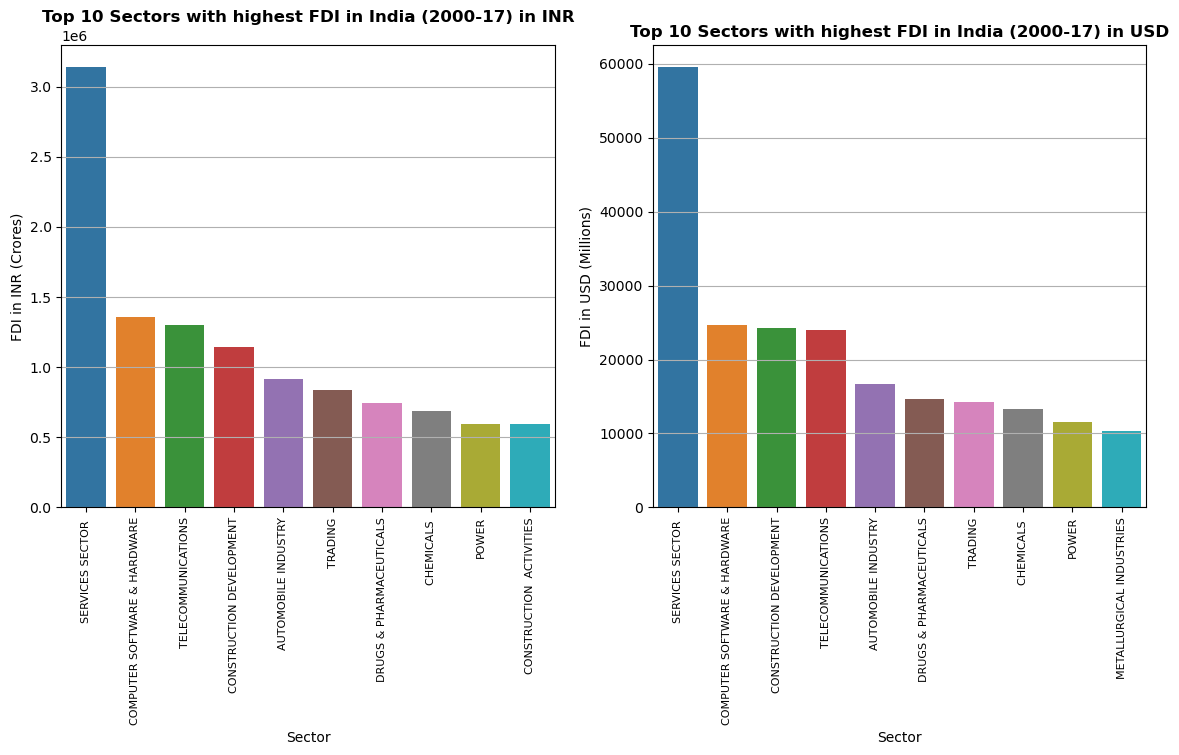

In [36]:
#Top 10 sectors by FDI
top10_sec_inr = fdi_sectors.sort_values(by='FDI in INR (Crores)', ascending=False).head(n=10)
top10_sec_usd = fdi_sectors.sort_values(by='FDI in USD (Millions)', ascending=False).head(n=10)

#Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) #1 row and 2 colunmns

#Subplot 1
sns.barplot(data=top10_sec_inr, x='Sector', y='FDI in INR (Crores)', ax=axes[0], hue='Sector')
axes[0].set_title('Top 10 Sectors with highest FDI in India (2000-17) in INR', fontweight='bold')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)
axes[0].grid(axis='y')

#Subplot 2
sns.barplot(data= top10_sec_usd, x='Sector', y='FDI in USD (Millions)', ax=axes[1], hue='Sector')
axes[1].set_title('Top 10 Sectors with highest FDI in India (2000-17) in USD', fontweight='bold')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)
axes[1].grid(axis='y')

plt.show()

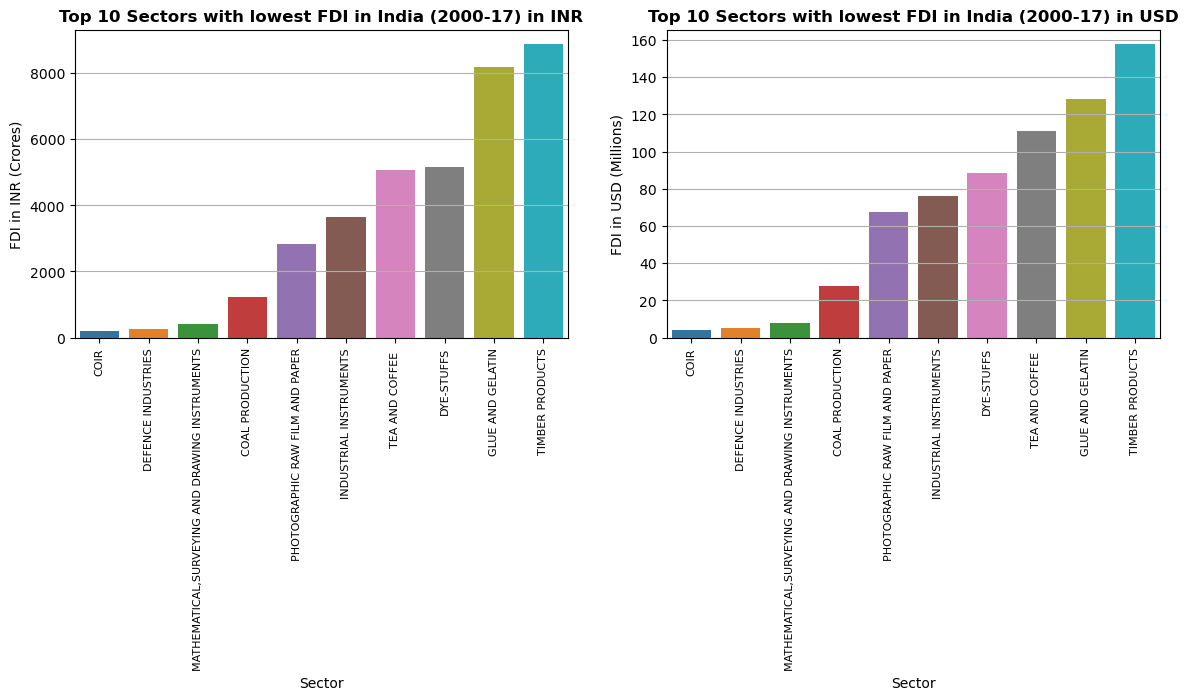

In [37]:
#Lowest 10 sectors by FDI
low10_sec_inr = fdi_sectors.sort_values(by='FDI in INR (Crores)').head(n=10)
low10_sec_usd = fdi_sectors.sort_values(by='FDI in USD (Millions)').head(n=10)

#Creating Subplots
fig, axes = plt.subplots(1,2, figsize=(14,4))

#Subplot 1
sns.barplot(data=low10_sec_inr, x='Sector', y='FDI in INR (Crores)', ax=axes[0], hue='Sector')
axes[0].set_title('Top 10 Sectors with lowest FDI in India (2000-17) in INR', fontweight='bold')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)
axes[0].grid(axis='y')

#Subplot 2
sns.barplot(data=low10_sec_usd, x='Sector', y='FDI in USD (Millions)', ax=axes[1], hue='Sector')
axes[1].set_title('Top 10 Sectors with lowest FDI in India (2000-17) in USD', fontweight='bold')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)
axes[1].grid(axis='y')

plt.show()

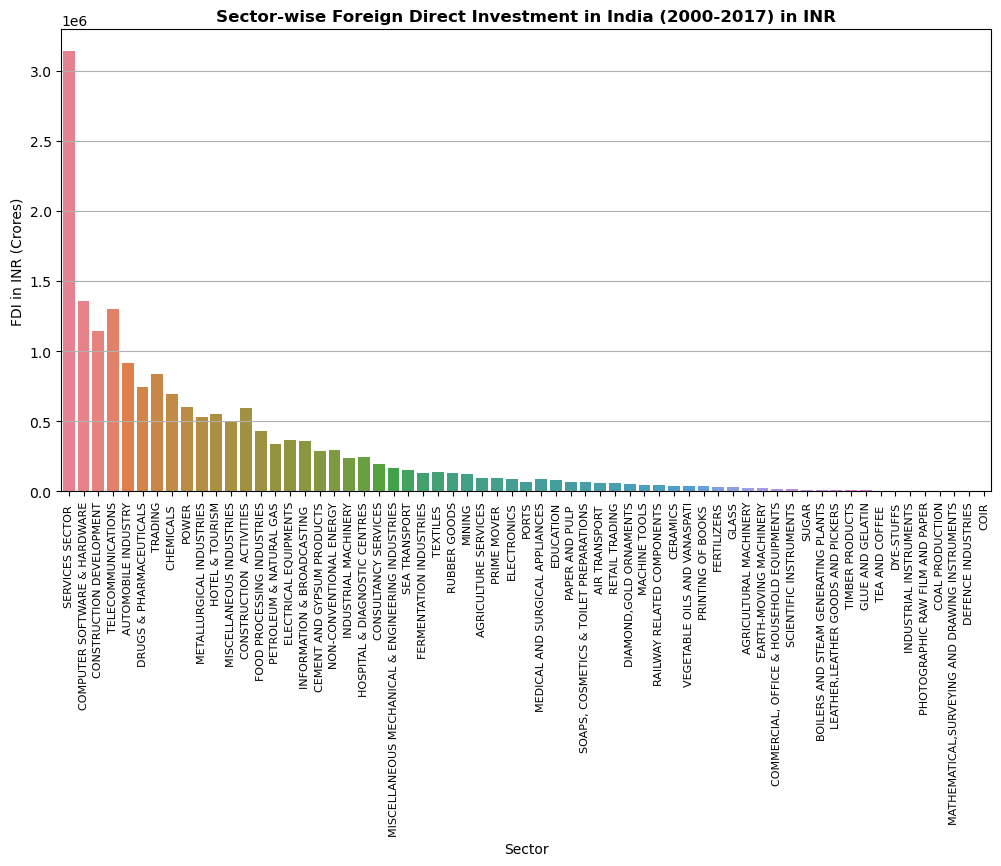

In [38]:
#All Sectors (INR)
plt.figure(figsize=(12,6))
sns.barplot(data=fdi_sectors, x='Sector', y = 'FDI in INR (Crores)', hue='Sector')
plt.title('Sector-wise Foreign Direct Investment in India (2000-2017) in INR', fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y')
plt.show()

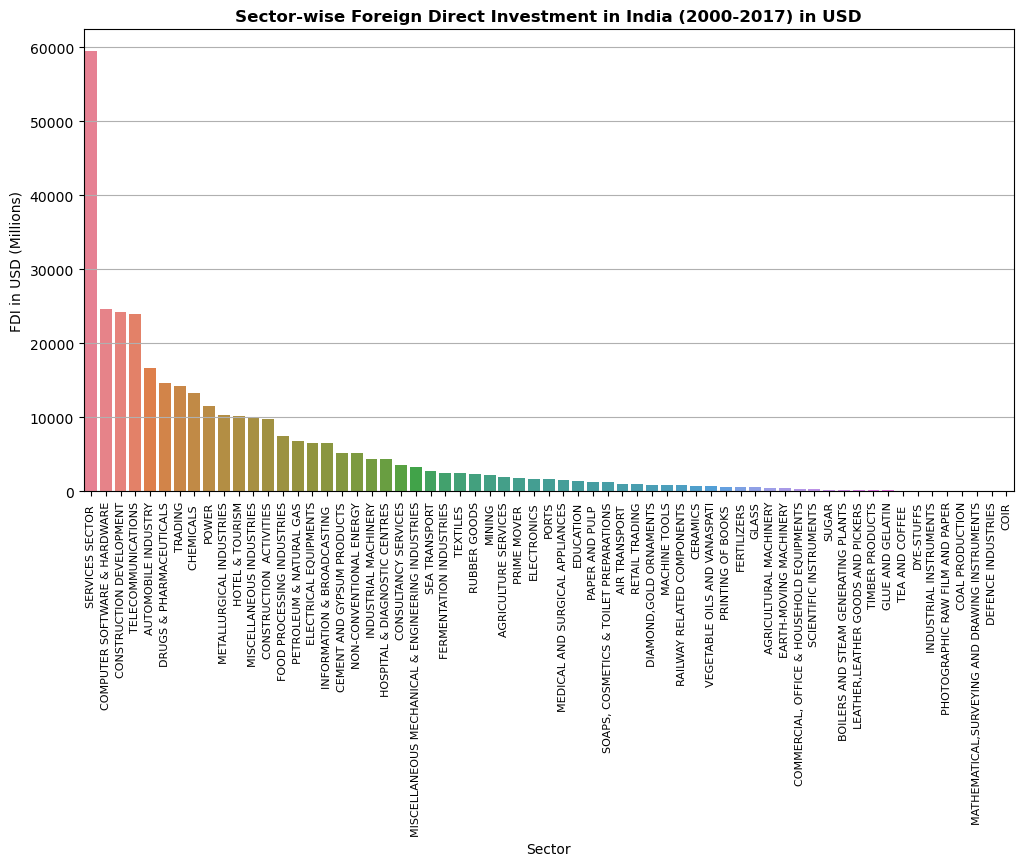

In [39]:
#All Sectors (USD)
plt.figure(figsize=(12,6))
sns.barplot(data=fdi_sectors, x='Sector', y = 'FDI in USD (Millions)', hue='Sector')
plt.title('Sector-wise Foreign Direct Investment in India (2000-2017) in USD', fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y')
plt.show()

##### Sectors with no investment

In [41]:
#Filtering the year columns with no investment
no_inv = fdi_inr[fdi_inr[fdi_inr.columns[1:]].isin([0]).any(axis=1)].drop(['FDI in INR (Crores)'], axis=1)
no_inv.head()

,Sector,Year
3,NON-CONVENTIONAL ENERGY,2000-01
4,COAL PRODUCTION,2000-01
6,BOILERS AND STEAM GENERATING PLANTS,2000-01
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),2000-01
14,AIR TRANSPORT (INCLUDING AIR FREIGHT),2000-01


In [42]:
sectors_gp = no_inv.groupby('Year').agg(lambda x: ', '.join(map(str, x)))

pd.set_option('display.max_colwidth', None) #To prevent truncation
print("YEARS WITH NO INVESTMENT BY SECTORS:")
sectors_gp

YEARS WITH NO INVESTMENT BY SECTORS:


,Sector
Year,
2000-01,"NON-CONVENTIONAL ENERGY, COAL PRODUCTION, BOILERS AND STEAM GENERATING PLANTS, PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS), AIR TRANSPORT (INCLUDING AIR FREIGHT), PORTS, RAILWAY RELATED COMPONENTS, EARTH-MOVING MACHINERY, MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, FERTILIZERS, PHOTOGRAPHIC RAW FILM AND PAPER, SUGAR, VEGETABLE OILS AND VANASPATI, SOAPS, COSMETICS & TOILET PREPARATIONS, GLUE AND GELATIN, TIMBER PRODUCTS, DEFENCE INDUSTRIES, HOSPITAL & DIAGNOSTIC CENTRES, EDUCATION, RETAIL TRADING, PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY), COIR, CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES"
2001-02,"NON-CONVENTIONAL ENERGY, COAL PRODUCTION, BOILERS AND STEAM GENERATING PLANTS, PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS), AIR TRANSPORT (INCLUDING AIR FREIGHT), RAILWAY RELATED COMPONENTS, MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, FERTILIZERS, PHOTOGRAPHIC RAW FILM AND PAPER, SUGAR, VEGETABLE OILS AND VANASPATI, SOAPS, COSMETICS & TOILET PREPARATIONS, DEFENCE INDUSTRIES, EDUCATION, RETAIL TRADING, PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY), COIR, CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES"
2002-03,"COAL PRODUCTION, BOILERS AND STEAM GENERATING PLANTS, PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS), MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, DYE-STUFFS, VEGETABLE OILS AND VANASPATI, SOAPS, COSMETICS & TOILET PREPARATIONS, DEFENCE INDUSTRIES, EDUCATION, RETAIL TRADING, TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER), COIR, CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES"
2003-04,"PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS), MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, SUGAR, SOAPS, COSMETICS & TOILET PREPARATIONS, GLUE AND GELATIN, DEFENCE INDUSTRIES, RETAIL TRADING, PRINTING OF BOOKS (INCLUDING LITHO PRINTING INDUSTRY), COIR, CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES"
2004-05,"COAL PRODUCTION, AGRICULTURAL MACHINERY, MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, GLUE AND GELATIN, RETAIL TRADING, CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES"
2005-06,"BOILERS AND STEAM GENERATING PLANTS, MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, PHOTOGRAPHIC RAW FILM AND PAPER, DYE-STUFFS, GLUE AND GELATIN, DEFENCE INDUSTRIES, RETAIL TRADING"
2006-07,"PORTS, INDUSTRIAL INSTRUMENTS, MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, DYE-STUFFS, GLUE AND GELATIN, TIMBER PRODUCTS, DEFENCE INDUSTRIES, RETAIL TRADING"
2007-08,"SCIENTIFIC INSTRUMENTS, DEFENCE INDUSTRIES"
2008-09,"BOILERS AND STEAM GENERATING PLANTS, MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS, GLUE AND GELATIN, DEFENCE INDUSTRIES, COIR"


In [43]:
sectors_gp = no_inv.groupby('Sector').agg(lambda x: ', '.join(map(str, x)))

pd.set_option('display.max_colwidth', None) #To prevent truncation
print("SECTORS WITH NO INVESTMENT BY YEARS:")
sectors_gp

SECTORS WITH NO INVESTMENT BY YEARS:


,Year
Sector,
AGRICULTURAL MACHINERY,2004-05
AIR TRANSPORT (INCLUDING AIR FREIGHT),"2000-01, 2001-02"
BOILERS AND STEAM GENERATING PLANTS,"2000-01, 2001-02, 2002-03, 2005-06, 2008-09"
COAL PRODUCTION,"2000-01, 2001-02, 2002-03, 2004-05, 2009-10, 2010-11, 2011-12, 2012-13, 2014-15, 2015-16, 2016-17"
COIR,"2000-01, 2001-02, 2002-03, 2003-04, 2008-09, 2015-16, 2016-17"
CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,"2000-01, 2001-02, 2002-03, 2003-04, 2004-05"
DEFENCE INDUSTRIES,"2000-01, 2001-02, 2002-03, 2003-04, 2005-06, 2006-07, 2007-08, 2008-09, 2009-10, 2010-11, 2016-17"
DYE-STUFFS,"2002-03, 2005-06, 2006-07, 2012-13, 2013-14"
EARTH-MOVING MACHINERY,2000-01


#### Year-wise Analysis

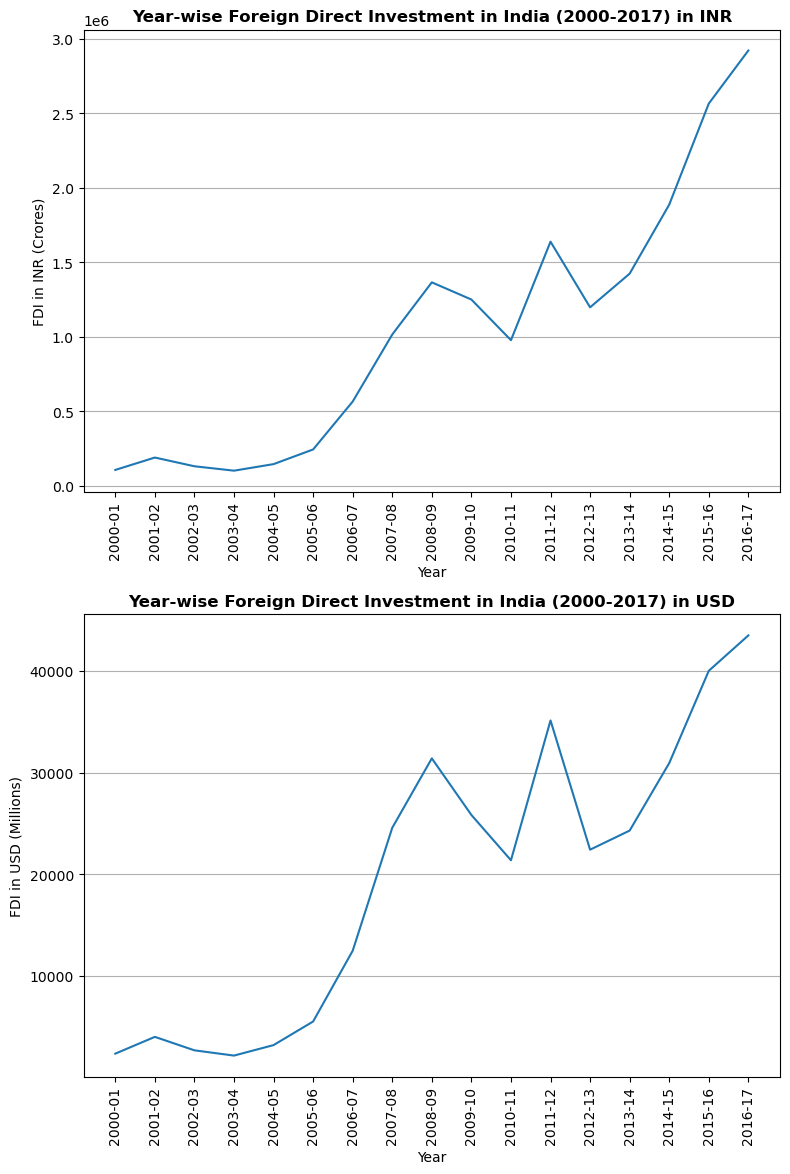

In [45]:
fig, axes = plt.subplots(2,1, figsize=(8,12))

#Subplot 1
sns.lineplot(data=fdi_years, x='Year', y='FDI in INR (Crores)', ax=axes[0])
axes[0].set_title('Year-wise Foreign Direct Investment in India (2000-2017) in INR', fontweight='bold')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y')

#Subplot 2
sns.lineplot(data=fdi_years, x='Year', y='FDI in USD (Millions)', ax=axes[1])
axes[1].set_title('Year-wise Foreign Direct Investment in India (2000-2017) in USD', fontweight='bold')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

## CONCLUSION <a id="goodbye"></a>
Based on my analysis and the Tableau Dashboard, I conclude the following:
- The total Foreign Direct Investment inflow into the country from 2000 to 2017 amounted to ₹17,734,737.44.
- This inflow was distributed across 63 sectors.
- The Service Sector was the leading contributor to FDI during this period.
- The COIR sector was the least contributor to FDI.
- Over the years, the number of sectors with no investment has reduced which is a positive sign.
- There has been an overall upward trend in the country’s Foreign Direct Investment over the years.

#### Recommendations:
- Evaluate the least contributing sectors to identify potential improvements or policy changes that could enhance their FDI contribution.
- Provide incentives to investors to encourage their interest in and investment in these underperforming sectors.

<p style="text-align:center;"> - THANK YOU - </p>